# KÜTÜPHANELERİN **EKLENMESİ**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

Bu projede kullanılan bütün kütüphaneler import edilerek projeye başlanmıştır.

# DOSYADAN VERİNİN OKUNMASI VE VERİNİN TEMİZLENMESİ

In [ ]:
df = pd.read_csv('house_sales.csv',on_bad_lines='skip')
df.drop(['Unnamed: 0', 'address','school information','crime information','commute information','shop and eat information','description','home details','price details','assessment year','tax','land assessment cost','improvement cost','total cost','neighborhood name','what local say about the neighborhood','comments of residents and previous residents','comparable properties','provider info','seo description','linktoproperty','Lat','Lon'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bath               5893 non-null   object 
 1   bed                5953 non-null   object 
 2   sqft               5799 non-null   object 
 3   Price              4098 non-null   float64
 4   estimated_mortage  5962 non-null   object 
dtypes: float64(1), object(4)
memory usage: 240.9+ KB


ilk olarak veri dosyası *pd.read_csv*  metodu kullanılarak okunuyor veri okutulduktan sonra veride gereksiz olan sütunlar atılıyor ve verinin geri kalanı hakkında bilgi almak için *df.info*  metodu kullanılıyor








In [ ]:
df['bath'].replace(' Bath','',regex=True,inplace=True)
df['bath'].replace('s','',regex=True,inplace=True)
df.dropna(inplace=True)
df['bath'].unique()

array(['2', '4', '1', '3', '8', '7', '5', '6', '12', '9', '5.5', '2.5',
       '10', '11', '13', '1.5', '22', '16', '19', '15', '20', '28', '14',
       '4.5'], dtype=object)

makine öğrenmesi için sayısal değerleri içeren sütunlar oluşturmaya çalışıyoruz yukarıdaki kodda bath sütununda bulunan stringleri temizliyoruz temizleme işleminde *replace* metodu kullanılır ardından da verideki genel NaN değerler siliniyor.

In [ ]:
banyo = {
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9,
    '10' : 10,
    '11' : 11,
    '12' : 12,
    '13' : 13,
    '14' : 14,
    '15' : 15,
    '16' : 16,
    '19' : 19,
    '20' : 20,
    '22' : 22,
    '28' : 28,
    '5.5' : 6,
    '2.5' : 3,
    '1.5' : 2,
    '4.5' : 5
}

df['bath'] = df['bath'].map(banyo)
df['bath'] = df['bath'].astype(float)
df.head(10)

,bath,bed,sqft,Price,estimated_mortage
3,2.0,3 Beds,"1,350 sqft",425309.0,"Est. Mortgage$2,774/mo"
4,4.0,3 Beds,"1,900 sqft",903453.0,"Est. Mortgage$4,711/mo"
5,1.0,2 Beds,700 sqft,549000.0,"Est. Mortgage$4,138/mo"
6,2.0,3 Beds,"1,184 sqft",699000.0,"Est. Mortgage$3,211/mo"
7,2.0,4 Beds,"2,000 sqft",1050000.0,"Est. Mortgage$4,786/mo"
11,2.0,3 Beds,"1,845 sqft",609000.0,"Est. Mortgage$2,919/mo"
12,2.0,3 Beds,"2,356 sqft",1468000.0,"Est. Mortgage$6,661/mo"
13,1.0,1 Bed,"149,520 sqft",195000.0,"Est. Mortgage$1,600/mo"
14,2.0,3 Beds,"1,300 sqft",596000.0,"Est. Mortgage$3,813/mo"
15,3.0,3 Beds,"2,000 sqft",860600.0,"Est. Mortgage$3,888/mo"


*bath.unique* metodu kullanılarak evlerde bulunan birbirinden farklı banyo sayılarına ulaştık ardından bunları sayısal değerlere dönüştürüp kullanacağımız data setinin içine atıyoruz.

In [ ]:
df['bed'].replace(' Beds','',regex=True,inplace=True)
df['bed'].replace(' Bed','',regex=True,inplace=True)
df['bed'].unique()


array(['3', '2', '4', '1', '5', '9', '8', '6', '7', 'Studio', '10', '21',
       '11', '16', '12', '23', '24', '18', '15', '50'], dtype=object)

bed sütunundaki stringileri temizliyoruz ve ardından evlerde bulunan yatak sayılarını yazdırıyoruz.

In [ ]:
yatak = {
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9,
    '10' : 10,
    '11' : 11,
    '12' : 12,
    '15' : 15,
    '16' : 16,
    '19' : 18,
    '21' : 21,
    '23' : 23,
    '24' : 24,
    '50' : 50,
    'Studio' : 0
}

df['bed'] = df['bed'].map(yatak)
df['bed'] = df['bed'].astype(float)
df.head(10)

,bath,bed,sqft,Price,estimated_mortage
3,2.0,3.0,"1,350 sqft",425309.0,"Est. Mortgage$2,774/mo"
4,4.0,3.0,"1,900 sqft",903453.0,"Est. Mortgage$4,711/mo"
5,1.0,2.0,700 sqft,549000.0,"Est. Mortgage$4,138/mo"
6,2.0,3.0,"1,184 sqft",699000.0,"Est. Mortgage$3,211/mo"
7,2.0,4.0,"2,000 sqft",1050000.0,"Est. Mortgage$4,786/mo"
11,2.0,3.0,"1,845 sqft",609000.0,"Est. Mortgage$2,919/mo"
12,2.0,3.0,"2,356 sqft",1468000.0,"Est. Mortgage$6,661/mo"
13,1.0,1.0,"149,520 sqft",195000.0,"Est. Mortgage$1,600/mo"
14,2.0,3.0,"1,300 sqft",596000.0,"Est. Mortgage$3,813/mo"
15,3.0,3.0,"2,000 sqft",860600.0,"Est. Mortgage$3,888/mo"


evlerde bulunan birbirinden farklı yatak sayılarına ulaştık ardından bunları sayısal değerlere dönüştürüp kullanacağımız data setinin içine atıyoruz.

In [ ]:
df['sqft'].replace(',','',regex=True,inplace=True)
df['sqft'].replace(' sqft','',regex=True,inplace=True)
df['sqft'] = df['sqft'].astype(int)
df.head()

,bath,bed,sqft,Price,estimated_mortage
3,2.0,3.0,1350,425309.0,"Est. Mortgage$2,774/mo"
4,4.0,3.0,1900,903453.0,"Est. Mortgage$4,711/mo"
5,1.0,2.0,700,549000.0,"Est. Mortgage$4,138/mo"
6,2.0,3.0,1184,699000.0,"Est. Mortgage$3,211/mo"
7,2.0,4.0,2000,1050000.0,"Est. Mortgage$4,786/mo"


yatak sayısı ve banyo sayısında yaptığımız gibi önce metrekare sütunundaki stringleri temizleyip integer olarak kullanacağımız data setine atıyoruz.

In [ ]:
df['estimated_mortage'].replace('Est. Mortgage','',regex=True,inplace=True)
df['estimated_mortage'].replace(',','',regex=True,inplace=True)
df['estimated_mortage'].replace('/mo','',regex=True,inplace=True)
df['estimated_mortage'].replace('\$','',regex=True,inplace=True)
df['estimated_mortage'] = df['estimated_mortage'].astype(float)
df.head()

,bath,bed,sqft,Price,estimated_mortage
3,2.0,3.0,1350,425309.0,2774.0
4,4.0,3.0,1900,903453.0,4711.0
5,1.0,2.0,700,549000.0,4138.0
6,2.0,3.0,1184,699000.0,3211.0
7,2.0,4.0,2000,1050000.0,4786.0


mortgage sütunu  için de aynı şeyleri tekrarlıyoruz ve verimiz makine öğrenmesi için hazır hale gelmiş bulunuyor.

# VERİLERİN GÖRSELLEŞTİRİLMESİ

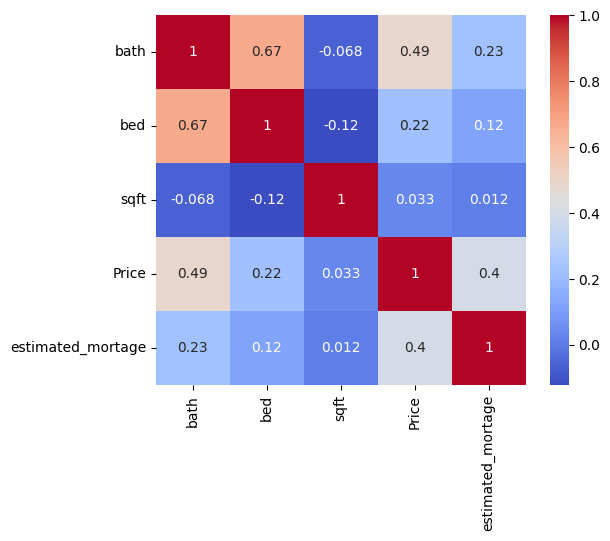

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

yukarıdaki kod bloğunda veri setimizdeki sütunlar arasındaki korelasyonlar gösterilmektedir.df.corr(), verilen DataFrame df içerisindeki sayısal sütunlar arasındaki korelasyon katsayılarını hesaplar. Korelasyon katsayısı, -1 ile 1 arasında bir değer alır ve iki değişken arasındaki doğrusal ilişkinin gücünü ve yönünü gösterir.

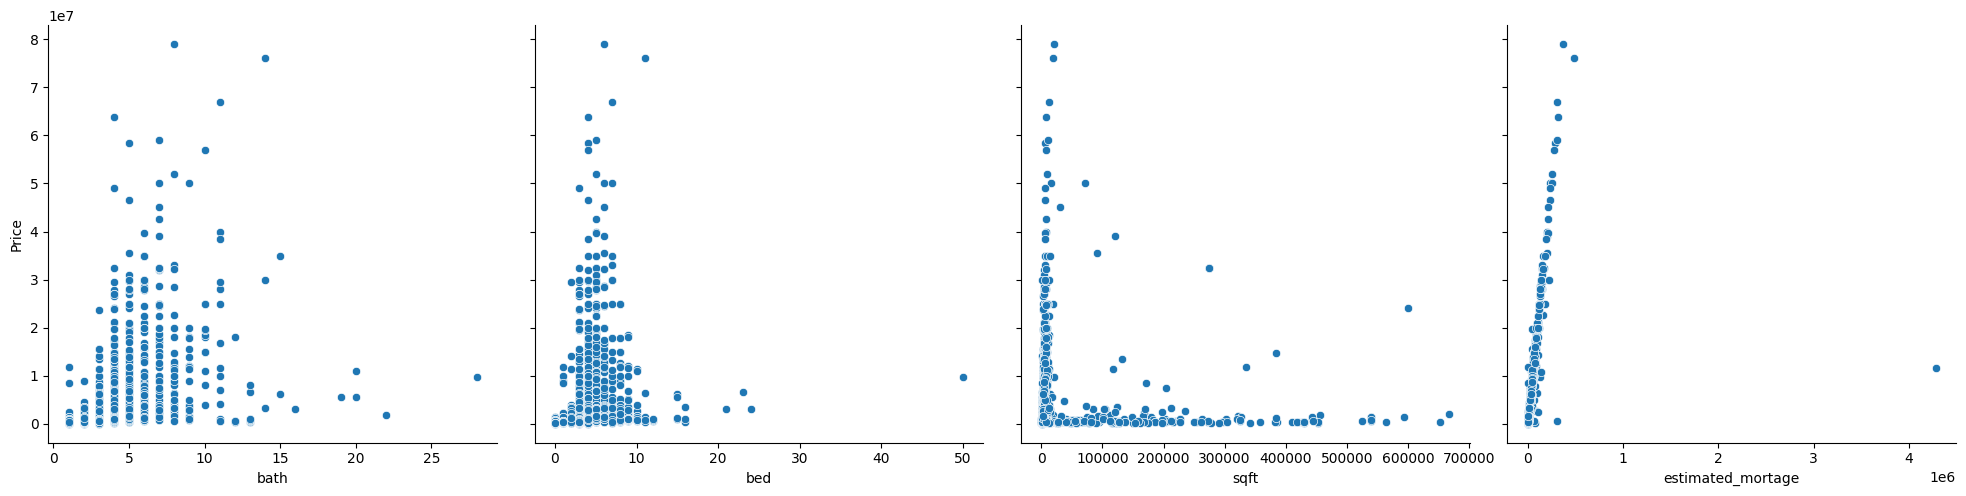

In [ ]:
sns.pairplot(df, x_vars=['bath', 'bed', 'sqft', 'estimated_mortage'], y_vars='Price', height=5, aspect=1)
plt.show()

Yukarıdaki kod bloğu veri setimizdeki "Price" sütunu ile diğer sütunların ilişkisini gösteren grafiği oluşturmaktadır.Bu grafikler, her bir değişkenin "Price" ile nasıl bir ilişki içinde olduğunu görsel olarak gösterir.

# MAKİNE ÖĞRENMESİ VE UYGUN ALGORİTMALARIN SEÇİLMESİ

In [ ]:
imputer = SimpleImputer(strategy='mean')

x = imputer.fit_transform(df[['bed', 'bath', 'estimated_mortage','sqft']])

y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Bu kod parçasında eksik veri tamamlanıyor ve ardından veriler eğitim ve test setlerine ayrılıyor. Veriler tamamlanırken *strategy = 'mean'* yöntemi kullanılıyor yani veri setimizdeki bed,bath,estimated_mortage ve sqft sayısal değerlerinin ortalaması alınıp boşluklar tamamlanıyor. *y = df['Price']* satırında Price hedef değişken yani tahmin edilecek değer olarak ayrılıyor. *train_test_split* fonksiyonu kullanılarak veri seti eğitim ve test setlerine bölünüyor. *test_size=0.2* parametresi, veri setinin %20'sinin test seti olarak kullanılacağını belirtiyor.

## Lineer Regression Algoritması

In [ ]:
model = LinearRegression()
model = model.fit(x_train, y_train)

scores = cross_val_score(model, x, y, cv=5, scoring='r2')

print('Cross-validation scores:')
print(scores)

print('Mean cross-validation score:', scores.mean())

print('model1:score (linear regression)')
model.score(x_test,y_test)

Cross-validation scores:
[ 0.44319777  0.36435459  0.05395104  0.42587509 -7.6245728 ]
Mean cross-validation score: -1.2674388605600773
model1:score (linear regression)


0.37890204979043074

Bu kod parçasında, linear regression modeli eğitiliyor, cross-validation ile model performansı değerlendiriliyor ve test seti üzerinde modelin doğruluk skoru hesaplanıyor. Adım adım satırları açıklamak gerekirse *LinearRegression()* sınıfı kullanılarak bir doğrusal regresyon modeli oluşturuluyor. *model.fit(x_train, y_train*) yöntemi, x_trainde bulunan veriler ile y_trainde bulunan veriler arasındaki ilişkiye göre eğitiliyor. *cross_val_score*   fonksiyonu kullanılarak modelin çapraz doğrulama skoru hesaplanıyor.  cv=5, veri setinin 5 katmanlı çapraz doğrulama ile değerlendirileceğini belirtir. scoring='r2' ile modelin değerlendirilmesi için R² metriği kullanılır. Mean cross validation score eksi olarak çıkmıştır yani buradan anlamamız gereken şey veri setimizi lineer regression algoritması için pek uygun değildir.

## Decision Tree Algoritması

In [ ]:

model = DecisionTreeRegressor()

model.fit(x_train, y_train)
print('model2:score (decision tree)')
model.score(x_test,y_test)

model2:score (decision tree)


0.8889609613037851

*DecisionTreeRegressor()* sınıfı kullanılarak bir Karar Ağacı Regressörü modeli oluşturuluyor. Decision Tree , eğitim verisindeki ilişkiler ve kalıplara dayalı olarak dallanma ve ayrılma kuralları oluşturur. *fit()* yöntemi kullanılarak model eğitiliyor ve *model.score(x_test, y_test)* yöntemiyle de, test seti üzerindeki model performansını değerlendiriliyor. R² skoru olarak sonuç alınır bu sonucunda 1 e yakın olduğu görülür doğruluk payının böyle bir büyük veri seti için iyi olduğu söylenebilir.

## Kmeans Algoritması

In [ ]:

df_imputed = imputer.fit_transform(df[['bed', 'bath', 'sqft', 'estimated_mortage']])

df['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(df_imputed)
score = silhouette_score(df_imputed, df['cluster'])
print(f"Silhoutte Score: {score}")

df['cluster'] = KMeans(n_clusters=4, random_state=42).fit_predict(df_imputed)
score2 = silhouette_score(df_imputed, df['cluster'])
print(f"Silhoutte Score: {score2}")

df['cluster'] = KMeans(n_clusters=2, random_state=42).fit_predict(df_imputed)  # Best Score
score3 = silhouette_score(df_imputed, df['cluster'])
print(f"Silhoutte Score: {score3}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score: 0.9272860262934697


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score: 0.8700861953339378


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhoutte Score: 0.9918473564970515


Bu kod parçasında, veri kümesi üzerinde K-Means algoritması kullanılarak  clustering yapılmakta ve modelin performansı silhouette score metriği ile değerlendirilmektedir. *KMeans(n_clusters=3, random_state=42) *ifadesi ile 3 küme olacak şekilde bir K-Means modeli oluşturuluyor. *fit_predict()* metodu, df_imputed veri kümesi üzerinde modeli eğitir ve her veri noktasını hangi kümeye ait olduğunu tahmin eder. Tahmin edilen küme bilgileri, *df['cluster']* sütununa kaydediliyor. *silhouette_score(df_imputed, df['cluster'])* metodu, kümeleme kalitesini değerlendiren bir metriği hesaplar. Silhouette Score, verilerin kendi kümeleri içinde ne kadar iyi gruplanmış olduğunu ölçer. Skor 1'e yakınsa iyi bir kümeleme, 0'a yakınsa zayıf, negatifse kötü bir kümeleme anlamına gelir. Sırasıyla 4 küme ve 2 küme için de aynı işlemler tekrarlandı ve 2 kümeli silhoutte scoreların oldukça başarılı olduğu gözlemlendi ve o model ile devam edildi. En iyi kümeyi bulmak için yapay zekadan yardım alındı ve birkaç küme örneği denendi.